# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude

from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [34]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [38]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?APPID={weather_api_key}"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather ["coord"]["lat"]
        city_lng = city_weather ["coord"]["lon"]
        city_max_temp = city_weather ["main"]["temp_max"]
        city_humidity = city_weather ["main"]["humidity"]
        city_clouds = city_weather ["clouds"]["all"]
        city_wind =city_weather ["wind"]["speed"]
        city_country = city_weather ["sys"]["country"]
        city_date =city_weather ["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | eureka
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | mejit
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | utrik
Processing Record 7 of Set 1 | codrington
Processing Record 8 of Set 1 | mga
Processing Record 9 of Set 1 | tazovsky
Processing Record 10 of Set 1 | afaahiti
Processing Record 11 of Set 1 | ancud
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | kuta
Processing Record 14 of Set 1 | vanino
Processing Record 15 of Set 1 | luganville
Processing Record 16 of Set 1 | wailua homesteads
Processing Record 17 of Set 1 | shangrao
Processing Record 18 of Set 1 | tanggu
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | sungai raya
Processing Record 21 of Set 1 | lihue
Processing Record 22 of Set 1 | adamstown
Processing Record 23

Processing Record 41 of Set 4 | glace bay
Processing Record 42 of Set 4 | arraial do cabo
Processing Record 43 of Set 4 | kindu
Processing Record 44 of Set 4 | mirny
Processing Record 45 of Set 4 | toro
Processing Record 46 of Set 4 | cabo san lucas
Processing Record 47 of Set 4 | kharp
Processing Record 48 of Set 4 | zvolen
Processing Record 49 of Set 4 | sakaiminato
Processing Record 0 of Set 5 | katsuren-haebaru
Processing Record 1 of Set 5 | trevelin
Processing Record 2 of Set 5 | anadyr
Processing Record 3 of Set 5 | san juan de miraflores
Processing Record 4 of Set 5 | kirensk
Processing Record 5 of Set 5 | al kharj
Processing Record 6 of Set 5 | zaragoza
Processing Record 7 of Set 5 | east ballina
Processing Record 8 of Set 5 | machico
Processing Record 9 of Set 5 | stanley
Processing Record 10 of Set 5 | mariestad
Processing Record 11 of Set 5 | nchelenge
Processing Record 12 of Set 5 | fale old settlement
Processing Record 13 of Set 5 | ha tinh
Processing Record 14 of Set 5 | 

Processing Record 33 of Set 8 | fort st. john
Processing Record 34 of Set 8 | beroroha
Processing Record 35 of Set 8 | andalgala
Processing Record 36 of Set 8 | karratha
Processing Record 37 of Set 8 | walvis bay
Processing Record 38 of Set 8 | borzya
Processing Record 39 of Set 8 | rawson
Processing Record 40 of Set 8 | takamaka
City not found. Skipping...
Processing Record 41 of Set 8 | new norfolk
Processing Record 42 of Set 8 | el bauga
Processing Record 43 of Set 8 | hawaiian paradise park
Processing Record 44 of Set 8 | muroto-misakicho
Processing Record 45 of Set 8 | mount isa
Processing Record 46 of Set 8 | las vegas
Processing Record 47 of Set 8 | kwang binh
Processing Record 48 of Set 8 | barreiras
Processing Record 49 of Set 8 | kapoeta
Processing Record 0 of Set 9 | broken hill
Processing Record 1 of Set 9 | laguna
Processing Record 2 of Set 9 | kerikeri
Processing Record 3 of Set 9 | sinop
Processing Record 4 of Set 9 | ilok
Processing Record 5 of Set 9 | nemuro
Processing

Processing Record 23 of Set 12 | soderhamn
Processing Record 24 of Set 12 | san luis de la loma
Processing Record 25 of Set 12 | ratnagiri
Processing Record 26 of Set 12 | klyuchi
Processing Record 27 of Set 12 | aldan
Processing Record 28 of Set 12 | we
City not found. Skipping...
Processing Record 29 of Set 12 | strezhevoy
Processing Record 30 of Set 12 | santiago
Processing Record 31 of Set 12 | argo
Processing Record 32 of Set 12 | flin flon
Processing Record 33 of Set 12 | priozersk
Processing Record 34 of Set 12 | essaouira
Processing Record 35 of Set 12 | cidade velha
Processing Record 36 of Set 12 | ambovombe
Processing Record 37 of Set 12 | verdal
Processing Record 38 of Set 12 | pontes e lacerda
Processing Record 39 of Set 12 | morehead city
Processing Record 40 of Set 12 | san pedro
Processing Record 41 of Set 12 | brookings
Processing Record 42 of Set 12 | nguigmi
Processing Record 43 of Set 12 | zharkent
Processing Record 44 of Set 12 | cargados carajos
City not found. Ski

In [40]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)




# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [41]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,eureka,40.8021,-124.1637,292.41,77,4,1.34,US,1695494204
1,mejit,10.2753,170.8646,301.59,73,100,3.34,MH,1695494204
2,albany,42.6001,-73.9662,288.38,79,100,0.89,US,1695494194
3,blackmans bay,-43.0167,147.3167,280.11,93,31,2.59,AU,1695494204
4,utrik,11.2278,169.8474,301.57,75,100,8.81,MH,1695494204


In [42]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [43]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,eureka,40.8021,-124.1637,292.41,77,4,1.34,US,1695494204
1,mejit,10.2753,170.8646,301.59,73,100,3.34,MH,1695494204
2,albany,42.6001,-73.9662,288.38,79,100,0.89,US,1695494194
3,blackmans bay,-43.0167,147.3167,280.11,93,31,2.59,AU,1695494204
4,utrik,11.2278,169.8474,301.57,75,100,8.81,MH,1695494204


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

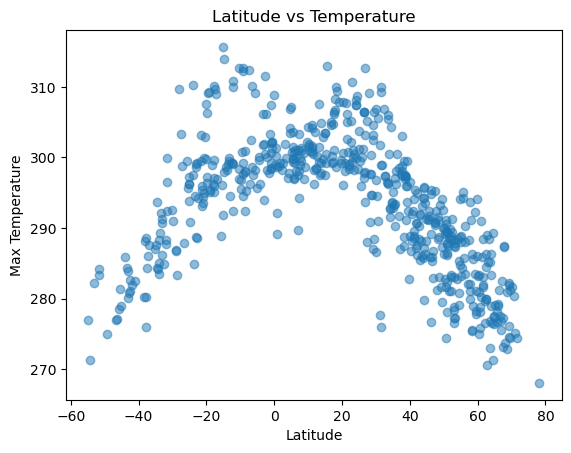

In [45]:
# Build scatter plot for latitude vs. temperature

lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]

plt.scatter(lat, max_temp, marker="o", alpha = 0.5, label="Cities")


# Incorporate the other graph properties
plt.title("Latitude vs Temperature")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

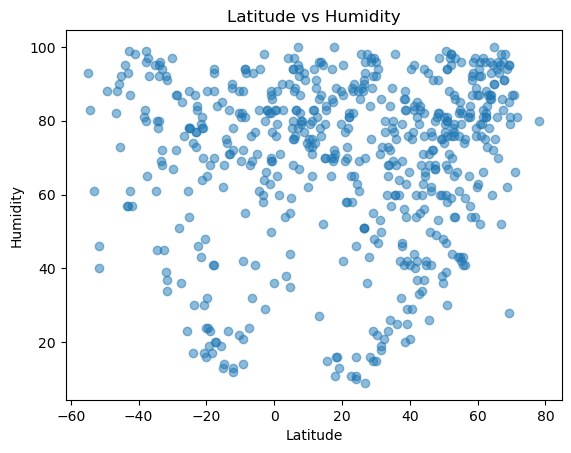

In [47]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df["Lat"]
humid = city_data_df["Humidity"]

plt.scatter(lat, humid, marker="o", alpha = 0.5, label="Cities")


# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

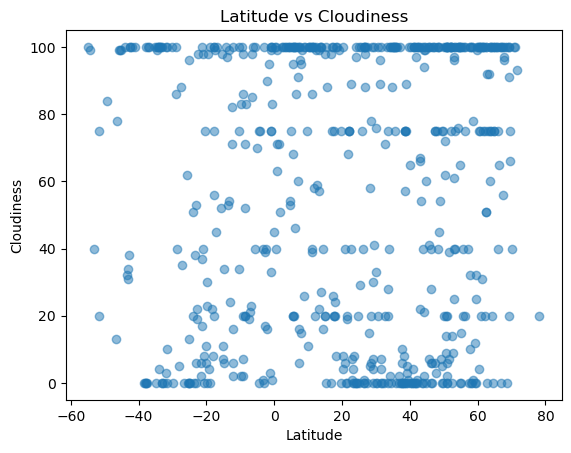

In [50]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df["Lat"]
cloud = city_data_df["Cloudiness"]

plt.scatter(lat, cloud, marker="o", alpha = 0.5, label="Cities")

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

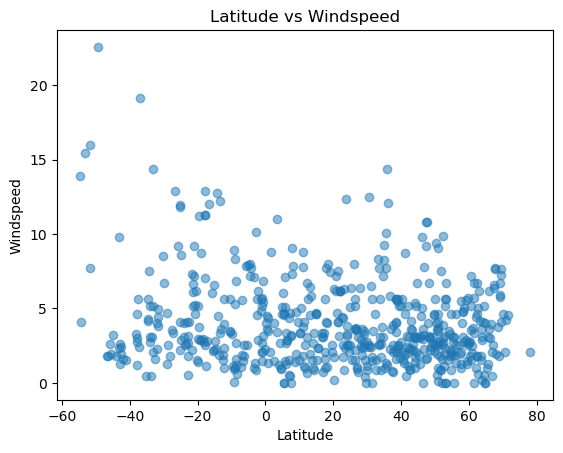

In [52]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df["Lat"]
wind = city_data_df["Wind Speed"]
plt.scatter(lat, wind, marker="o", alpha = 0.5, label="Cities")
# Incorporate the other graph properties
plt.title("Latitude vs Windspeed")
plt.ylabel("Windspeed")
plt.xlabel("Latitude")
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [65]:
# Define a function to create Linear Regression plots
def linear_regression(x_values,y_values,title,text_coordinates):
    (slope, intercept,rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y ="+str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    print(f"The r-squared is: {rvalue}")

In [66]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,eureka,40.8021,-124.1637,292.41,77,4,1.34,US,1695494204
1,mejit,10.2753,170.8646,301.59,73,100,3.34,MH,1695494204
2,albany,42.6001,-73.9662,288.38,79,100,0.89,US,1695494194
4,utrik,11.2278,169.8474,301.57,75,100,8.81,MH,1695494204
6,mga,59.7500,31.0667,294.11,62,99,5.69,RU,1695494205


In [67]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,blackmans bay,-43.0167,147.3167,280.11,93,31,2.59,AU,1695494204
5,codrington,-38.2667,141.9667,280.28,81,0,3.27,AU,1695494204
8,afaahiti,-17.7500,-149.2833,295.08,93,100,11.29,PF,1695494205
9,ancud,-41.8697,-73.8203,282.00,57,100,1.63,CL,1695494206
10,puerto natales,-51.7236,-72.4875,283.40,46,75,7.72,CL,1695494206


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8027722250082373


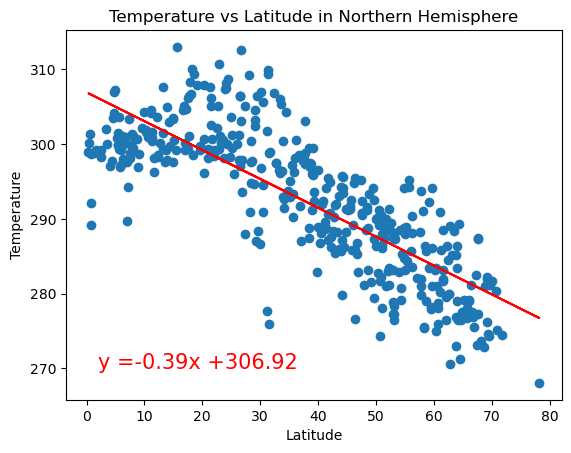

In [74]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
linear_regression(x_values,y_values, "Max Temp", (2,270))
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Temperature vs Latitude in Northern Hemisphere")
plt.show()

The r-squared is: 0.7614826149425955


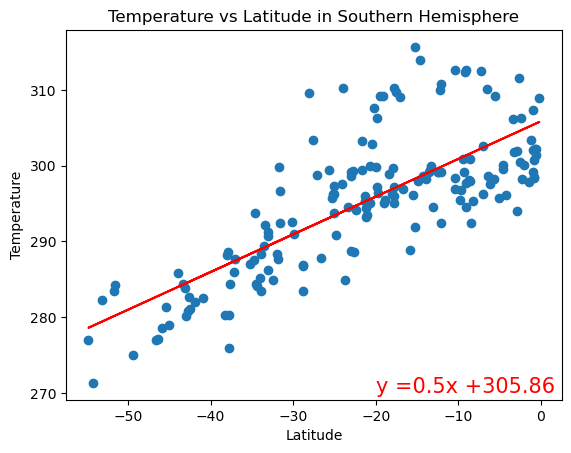

In [75]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
linear_regression(x_values,y_values, "Max Temp", (-20,270))
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Temperature vs Latitude in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship: The r-sqaured values of both the southern and northern hemisphere when looking at temperature and latitude are high values indicating that the line represents the data well. From the graphs we can see that there is negtaive correlation between temp and latitude in the northern hemisphere and there is a positive correlation between temp and latitude in the southern hemisphere

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.08280742611710425


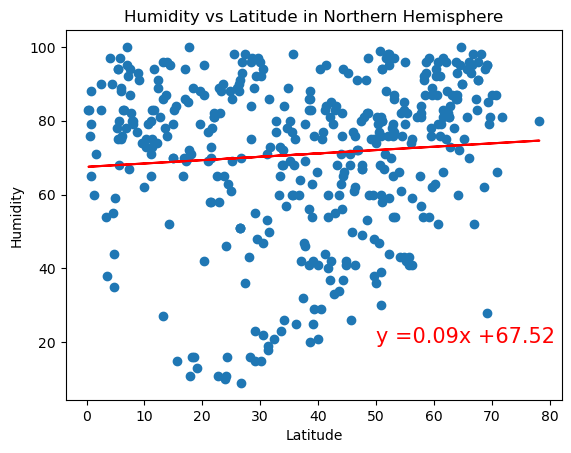

In [80]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
linear_regression(x_values,y_values, "Humidity", (50,20))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude in Northern Hemisphere")
plt.show()

The r-squared is: -0.16284670886660188


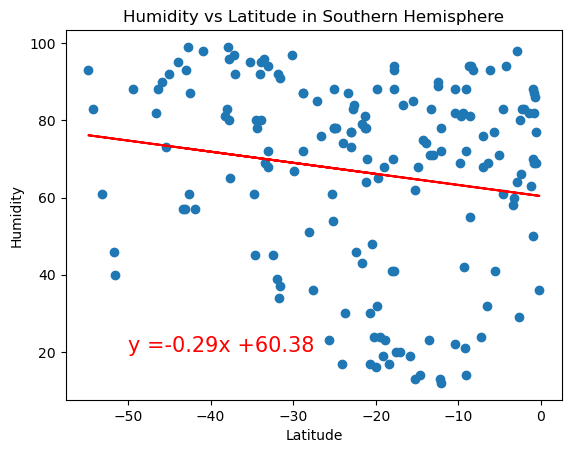

In [81]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
linear_regression(x_values,y_values, "Humidity", (-50,20))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:**  The r-sqaured values of both the southern and northern hemisphere when looking at humidity and latitude are low values indicating that the line represents the data not well. From the graphs we cannot see a clear correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.005469667506481667


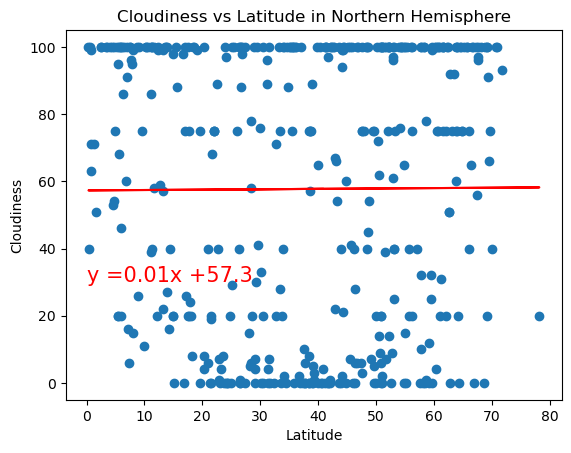

In [85]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
linear_regression(x_values,y_values, "Cloudiness", (0,30))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude in Northern Hemisphere")
plt.show()

The r-squared is: -0.05976011387985818


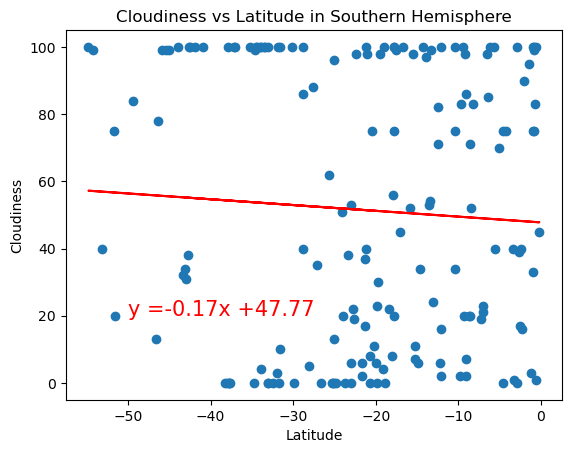

In [87]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
linear_regression(x_values,y_values, "Cloudiness", (-50,20))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** The r-sqaured values of both the southern and northern hemisphere when looking at Cloudiness and latitude are low values indicating that the line represents the data not well. From the graphs we cannot see a clear correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.033179918517999875


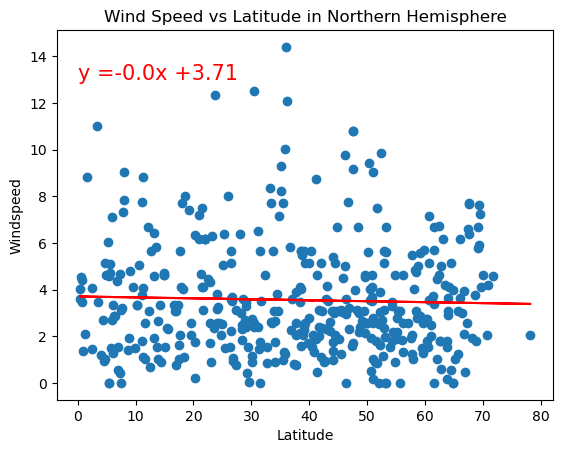

In [90]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
linear_regression(x_values,y_values, "Windspeed", (0,13))
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.title("Wind Speed vs Latitude in Northern Hemisphere")
plt.show()

The r-squared is: -0.15249916684179785


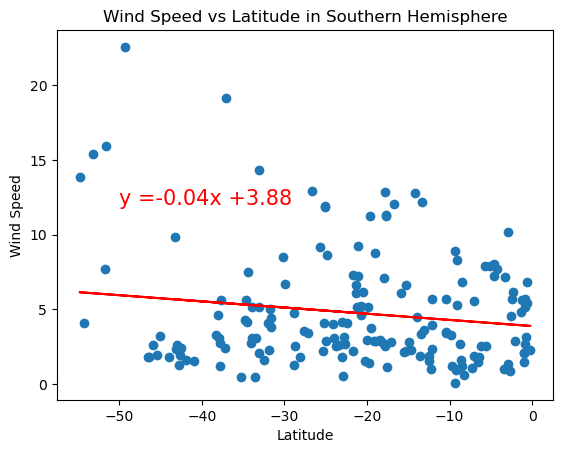

In [91]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
linear_regression(x_values,y_values, "Wind Speed", (-50,12))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs Latitude in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** The r-sqaured values of both the southern and northern hemisphere when looking at Wind Speed and latitude are low values indicating that the line represents the data not well. From the graphs we cannot see a clear correlation.